# PROJECT : SPORTS CELEBRITY IMAGE CLASSIFICATION 

In [ ]:
END GOAL IS TO BUILD A WEBSITE WHERE ONE CAN SEARCH FOR NAME OF A SPORTS PERSON USING AN IMAGE
At Output we will get correct identified image with highest probabilty.

In [ ]:
 While working on this project we will learn,

1) How to build end to end machine learning or data science project
2) Use Opencv library for face and eyes detection
3) data cleaning using opencv face detection and feature engineering using wavelet transforms
4) Model building using SVM, logistic regression, random  forest
5) Model fine tunning using gridsearchcv
6) Export model to a file and write python flask server around it that can server http requests generated by UI
7) Build ui using HTML,CSS,javascript and JQuery


# -- DATA CLEANING : 

#         (1) Preprocessing: Detect face and eyes 

In [ ]:
"""these are modules to install which deals with images and graph plotting"""
PyWavelets==1.3.0
opencv-python==4.8.0.76
seaborn==0.11.2

In [ ]:
When we look at any image, most of the time we identify a person using a face. 
An image might contain multiple faces,
also the face can be obstructed and not clear. The first step in our pre-processing pipeline 
is to detect faces from an image.
Once face is detected, we will detect eyes, if two eyes are detected then only
we keep that image otherwise discard it.

Now how do you detect face and eyes?
We will use haar cascade from opencv for this. Here is an article on this: 
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html?highlight=haar

In [1]:
import cv2 # helps in reading image(getting an image on the screen)

In [2]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread("D:\\DS\\New folder\\PROJECT2\\model\\test_images\\aal.jpeg")
img.shape  # 3D shape  here 3 is r g b values to read colours

(183, 275, 3)

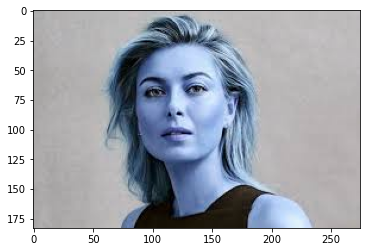

In [4]:
plt.imshow(img) #imshow is a method in matplot lib to show an image
#3D colourfull image

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape  #2D shape gray image as third dimension is removed

(183, 275)

In [6]:
gray # n dimensional array 

array([[168, 168, 168, ..., 192, 192, 192],
       [170, 170, 170, ..., 192, 192, 191],
       [172, 172, 172, ..., 191, 191, 190],
       ...,
       [165, 165, 167, ..., 171, 171, 171],
       [165, 166, 167, ..., 171, 171, 171],
       [165, 166, 168, ..., 170, 170, 170]], dtype=uint8)

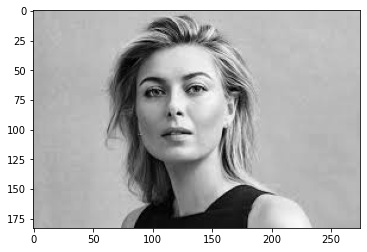

In [7]:
plt.imshow(gray, cmap='gray') # matplotib has imshow function to display an image
plt.show()

In [8]:
face_cascade = cv2.CascadeClassifier("D:\\DS\\New folder\\PROJECT2\\model\\opencv\\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("D:\\DS\\New folder\\PROJECT2\\model\\opencv\\haarcascades\\haarcascade_eye.xml")
#haarcascade allows to detect different feature of face/image
faces = face_cascade.detectMultiScale(gray,1.3,5) # 2D array

In [9]:
faces # array has value of X axis , Y axis, Width,Height for face detection

array([[73, 29, 97, 97]])

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(73, 29, 97, 97)

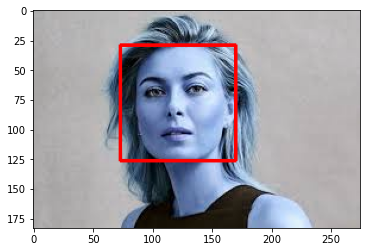

In [11]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
#(x,y),(x+w,y+h) is dimension of the face 'img'
# in img is original image draw an rectangle with rgb r red is 255 g is green 0 and b blue is 0 

In [12]:
# copied code from opencv documentation

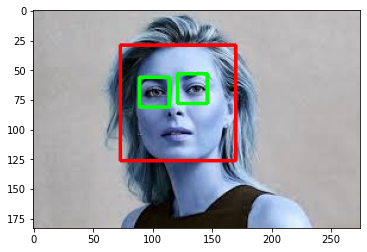

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces: # in image gray
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)  # r = 255 g=0 b=0
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]  #red rectange region for face
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes: # for loop for multiple eyes
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)  # r=0 g=255 r=0
        
#roi is region of interest
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

# (2) Preprocessing: Crop the facial region of the image

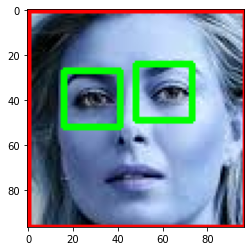

In [14]:
# will use cropped images for model training
%matplotlib inline
plt.imshow(roi_color, cmap='gray')  # cropped face of red region for easy detection
plt.show()

In [15]:
cropped_img = np.array(roi_color)
cropped_img.shape

(97, 97, 3)

# (3) Preprocessing: Use wavelet transform as a feature for      training our model

In [ ]:
Wavelet Transform (w2d) allows to extract important feature from images
In wavelet transformed image, you can see edges clearly and that can give us clues on various 
facial features such as eyes, nose, lips etc
There are other feature extraction techinques as well but wavelet is most effective method.

# Wavelet transform

In [16]:
#thanks stackoverflow
import numpy as np 
import pywt # py wavelet transform library
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H # returns image with wavelets transformed

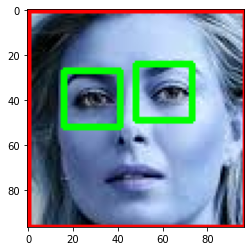

In [17]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [18]:
cropped_img = np.array(roi_color)
cropped_img.shape

(97, 97, 3)

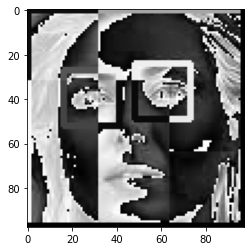

In [19]:
# by creating this black and white raw image we exract imp facial features 
#like eyes size face size, nose
#which are helpful for classification

im_har = w2d(cropped_img,'db1',5)#shows highlights important features
plt.imshow(im_har, cmap='gray')
# there are signals processing and maths involved like freq domain what furior transform
#FT means representating an image as a frequency
# FT takes complex signals and convert it into the basic one

In [ ]:
You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, 
lips etc. This along with raw pixel image can be used as an input for our classifier

In [ ]:
(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region

In [ ]:
Lets write a python function that can take input image and returns cropped image 
(if face and eyes >=2 are detected)

In [20]:
# function to read image and function returns a cropped face where eyes and face are detected clearly
def get_cropped_image_if_2_eyes(image_path):  
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

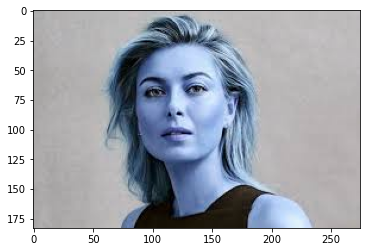

In [21]:
original_image = cv2.imread("D:\\DS\\New folder\\PROJECT2\\model\\test_images\\aal.jpeg")
plt.imshow(original_image)
plt.show()

In [22]:
# use of cropped image function

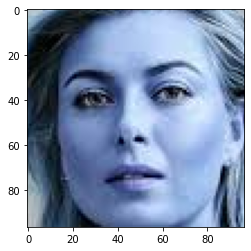

In [22]:
#calling an image
cropped_image = get_cropped_image_if_2_eyes("D:\\DS\\New folder\\PROJECT2\\model\\test_images\\aal.jpeg")
plt.imshow(cropped_image)
plt.show()# returns cropped image

## In below image face is not very clear and it doesn't have two eyes clearly visible
#Below cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training

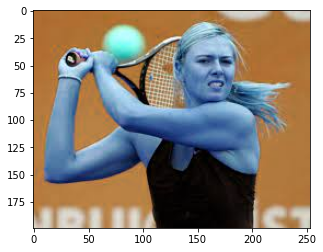

In [23]:
org_image_obstructed = cv2.imread("D:\\DS\\New folder\\PROJECT2\\model\\test_images\\b.jpeg")
plt.imshow(org_image_obstructed)
plt.show() # face is not clear and will not be used for classification purpose

In [24]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes("D:\\DS\\New folder\\PROJECT2\\model\\test_images\\b.jpeg")
cropped_image_no_2_eyes # returns no image (returns none) and discard image

In [25]:
# creating two path for raw images and cropped images and a new folders with only cropped face images
path_to_data = "D:\\DS\\New folder\\PROJECT2\\model\\dataset\\" # raw images folder
path_to_cr_data = "D:\\DS\\New folder\\PROJECT2\\model\\dataset\\cropped\\" # cropped images folder

In [26]:
import os  # python module it will go through all the sub directaries  
img_dirs = [] #and img dirs returns all sub folders
for entry in os.scandir(path_to_data): # scan directrories
    if entry.is_dir():
        img_dirs.append(entry.path)

In [27]:
img_dirs # seperte folders for all sports palyers

['D:\\DS\\New folder\\PROJECT2\\model\\dataset\\maria_sharapova',
 'D:\\DS\\New folder\\PROJECT2\\model\\dataset\\roger_federer',
 'D:\\DS\\New folder\\PROJECT2\\model\\dataset\\serena_williams',
 'D:\\DS\\New folder\\PROJECT2\\model\\dataset\\virat_kohli']

In [ ]:
Go through all images in dataset folder and create cropped images for them. 
There will be cropped folder inside dataset folder after you run this code

In [28]:
import shutil # helps to create new folder for cropped images seperately
if os.path.exists(path_to_cr_data):# if the folder exist remove it and create new folder
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data) # make directry for new cropped folder

In [ ]:
ITERATION CODE: 

In [29]:
cropped_image_dirs = [] # cropped images folders path for each sports player
celebrity_file_names_dict = {}    # dictionary have path of all cropped images

for img_dir in img_dirs:  # this code returns only name of sporta player
    count = 1 # initialize count
    celebrity_name = img_dir.split("\\") [-1] 
    # split each string with words and choose last [-1] word as name for a folder
    print(celebrity_name)# all list of celebraty name
    
    celebrity_file_names_dict[celebrity_name] = []
    #blank array in dictionary to insert all images path one by one
    
    for entry in os.scandir(img_dir):# helps to go through each images in all folders
        roi_color = get_cropped_image_if_2_eyes(entry.path) #return cropped images if clearly visible
        if roi_color is not None:# functions returns none if eyes are not detectable
            # store cropped images for each sports person
            cropped_folder = path_to_cr_data + celebrity_name# cropped folder with path to cr data
            if not os.path.exists(cropped_folder):# if folder does not exist then created new folder
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                #list of cropped image directaries append the cropped folder
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name =  celebrity_name + str(count) + ".jpg"
            #generates name of the file with name.jpg
            cropped_file_path = cropped_folder + "\\" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)#save image as roi color in cropped folder
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            #dictionary is used to stored all cropped images of each player in each folder
            count += 1 

maria_sharapova
Generating cropped images in folder:  D:\DS\New folder\PROJECT2\model\dataset\cropped\maria_sharapova
roger_federer
Generating cropped images in folder:  D:\DS\New folder\PROJECT2\model\dataset\cropped\roger_federer
serena_williams
Generating cropped images in folder:  D:\DS\New folder\PROJECT2\model\dataset\cropped\serena_williams
virat_kohli
Generating cropped images in folder:  D:\DS\New folder\PROJECT2\model\dataset\cropped\virat_kohli


In [ ]:
Now We have cropped folder under datasets folder that contains cropped images

# Manually examine cropped folder and delete any unwanted images

In [ ]:
celebrity_file_names_dict = {} is dictionary which has celebrity name as key and
values are cropped images.
Below code is iteration code 

In [30]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'maria_sharapova': ['D:\\DS\\New folder\\PROJECT2\\model\\dataset\\cropped\\maria_sharapova\\maria_sharapova1.jpg',
  'D:\\DS\\New folder\\PROJECT2\\model\\dataset\\cropped\\maria_sharapova\\maria_sharapova10.jpg',
  'D:\\DS\\New folder\\PROJECT2\\model\\dataset\\cropped\\maria_sharapova\\maria_sharapova11.jpg',
  'D:\\DS\\New folder\\PROJECT2\\model\\dataset\\cropped\\maria_sharapova\\maria_sharapova12.jpg',
  'D:\\DS\\New folder\\PROJECT2\\model\\dataset\\cropped\\maria_sharapova\\maria_sharapova13.jpg',
  'D:\\DS\\New folder\\PROJECT2\\model\\dataset\\cropped\\maria_sharapova\\maria_sharapova14.jpg',
  'D:\\DS\\New folder\\PROJECT2\\model\\dataset\\cropped\\maria_sharapova\\maria_sharapova15.jpg',
  'D:\\DS\\New folder\\PROJECT2\\model\\dataset\\cropped\\maria_sharapova\\maria_sharapova16.jpg',
  'D:\\DS\\New folder\\PROJECT2\\model\\dataset\\cropped\\maria_sharapova\\maria_sharapova17.jpg',
  'D:\\DS\\New folder\\PROJECT2\\model\\dataset\\cropped\\maria_sharapova\\maria_sharapova1

In [ ]:
# this below dictionary is used to return a celebrety name as X output

In [31]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'maria_sharapova': 0,
 'roger_federer': 1,
 'serena_williams': 2,
 'virat_kohli': 3}

# Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. 
Let's prepare X and y now

In [32]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files: # training file are all cropped images
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))# resize image and convert it to W2d
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))# same size for all raw and scalled images
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        # numpy has inbuilt funct which can vertically stack them raw images above wavelet Tranform images
        #32*32*3  means 3D colourfull images np.vstack 3 is RGB color 
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [33]:
len(X[0]) # X is a list which do not have  any shape
#len(X) # total images
# X[0] is size of each image

4096

In [34]:
32*32*3 + 32*32   
# sum of raw images (3D) 3 is rgb and wavelet transform images (2D)

4096

In [35]:
X[0] # first image in number form which represents colour or shade of an image as ML accept numbers

array([[ 24],
       [ 36],
       [ 30],
       ...,
       [255],
       [248],
       [  4]], dtype=uint8)

In [36]:
y[0]  # y is output name of the sports person

0

In [37]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape # convert into float and reshape images 225 total images
# every image is represented as an array with n dimensional list

(225, 4096)

In [38]:
X[0]  # float numbers helpfull in training model to avoid errors in sklearn and api
# int would still work but gives more error

array([ 24.,  36.,  30., ..., 255., 248.,   4.])

# Data cleaning process is done. Now we are ready to train our model

# We will use SVM with rbf kernel tuned with heuristic finetuning

In [ ]:
SVM Support Vector Machine/classifier

In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#creating pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
# scaling X train data using standardscaler
pipe.fit(X_train, y_train)
# fit will train model on x train and y train
pipe.score(X_test, y_test)
#checking performance of our model using x test y test

0.8596491228070176

In [ ]:
we are getting 85% accuracy by  using ML algorithm rather than using neural network

In [ ]:
detailed report : 
classification report does y prediction using X test and compare with Y test
0 1 2 3  are sport player number 

In [41]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        11
           1       0.82      0.90      0.86        10
           2       0.83      0.87      0.85        23
           3       0.87      1.00      0.93        13

    accuracy                           0.86        57
   macro avg       0.88      0.85      0.85        57
weighted avg       0.87      0.86      0.86        57



# Let's use GridSearch to try out different models with different paramets.Goal is to come up with best modle with best fine tuned parameters

In [42]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
Grid Search CV is used to hypertune paramters (rbf and c= 10)
grid search cv define various models to test which model is with highest accuracy

In [43]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000], # parameters of C
            'svc__kernel': ['rbf','linear']  # parameters of C
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10] # number of decision trees 1 , 5 ,10
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
pipeline to scale data first

In [44]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model']) #sk learn pipeline
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False) # cv is 5 cross folds 
    # cv cross validation gives avg score as output after 5 times 80-20 , 60-40,70-30 
    clf.fit(X_train, y_train)
    scores.append({  # appending scores here in scores
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df  # score using cross validation to which model to deploy

,model,best_score,best_params
0,svm,0.828520,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.750446,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.875758,{'logisticregression__C': 1}


In [ ]:
model with best scores  are on validatoin set of X values and with best parameters

In [45]:
best_estimators #trained model

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [46]:
best_estimators['svm'].score(X_test,y_test) # score using X y test set

0.8596491228070176

In [47]:
best_estimators['random_forest'].score(X_test,y_test)

0.7894736842105263

In [48]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8596491228070176

In [ ]:
=======  BEST CLASSIFICATION ALGORITHM ========

In [49]:
best_clf = best_estimators['svm']

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  2,  2,  0],
       [ 0,  9,  1,  0],
       [ 1,  0, 20,  2],
       [ 0,  0,  0, 13]], dtype=int64)

Text(69.0, 0.5, 'Truth')

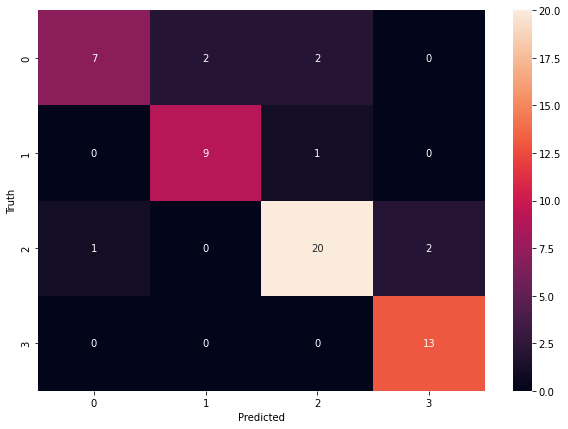

In [51]:
import seaborn as sn # to plot cm for good representation/visuals
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
# diagonal tell on how many samples model predicted correctly

In [52]:
class_dict

{'maria_sharapova': 0,
 'roger_federer': 1,
 'serena_williams': 2,
 'virat_kohli': 3}

# ---- Save the trained model-----

In [53]:
!pip install joblib 
import joblib 
# Save the  trained model as a pickle file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

# ---- Save class dictionary ----

In [54]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict)) # class dict is json object

In [55]:
class_dict

{'maria_sharapova': 0,
 'roger_federer': 1,
 'serena_williams': 2,
 'virat_kohli': 3}